In [1]:
%matplotlib inline


### Manifold Learning : tSNE and UMAP

Welcome to the "Unsupervised Data Analysis : tSNE and UMAP" practical session.  

Programming Language : Python 
Editor : Jupyter Notebook. 

Pandas : Data loading, processing, transformation and manipulation.
Scikit-learn : Example data source, ML and statistical analysis


In [24]:
## Load the necessary librarries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
#pip install umap-learn [ If you do not have umap library ]
import umap.umap_ as umap


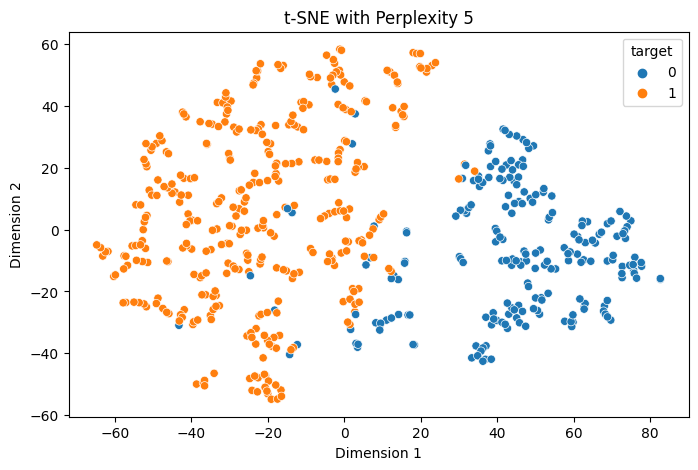

In [25]:
## Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

# Standardize features to have zero mean and unit variance
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

## Running t-SNE
tsne = TSNE(n_components=2, perplexity=5)
df_tsne_2 = tsne.fit_transform(df_scaled)


df_tsne_2 = pd.DataFrame(df_tsne_2, columns=['Dimension 1', 'Dimension 2'])
df_tsne_2['target'] = data.target
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_tsne_2, x='Dimension 1', y='Dimension 2', hue = 'target')
plt.title(f't-SNE with Perplexity 5')
plt.show()


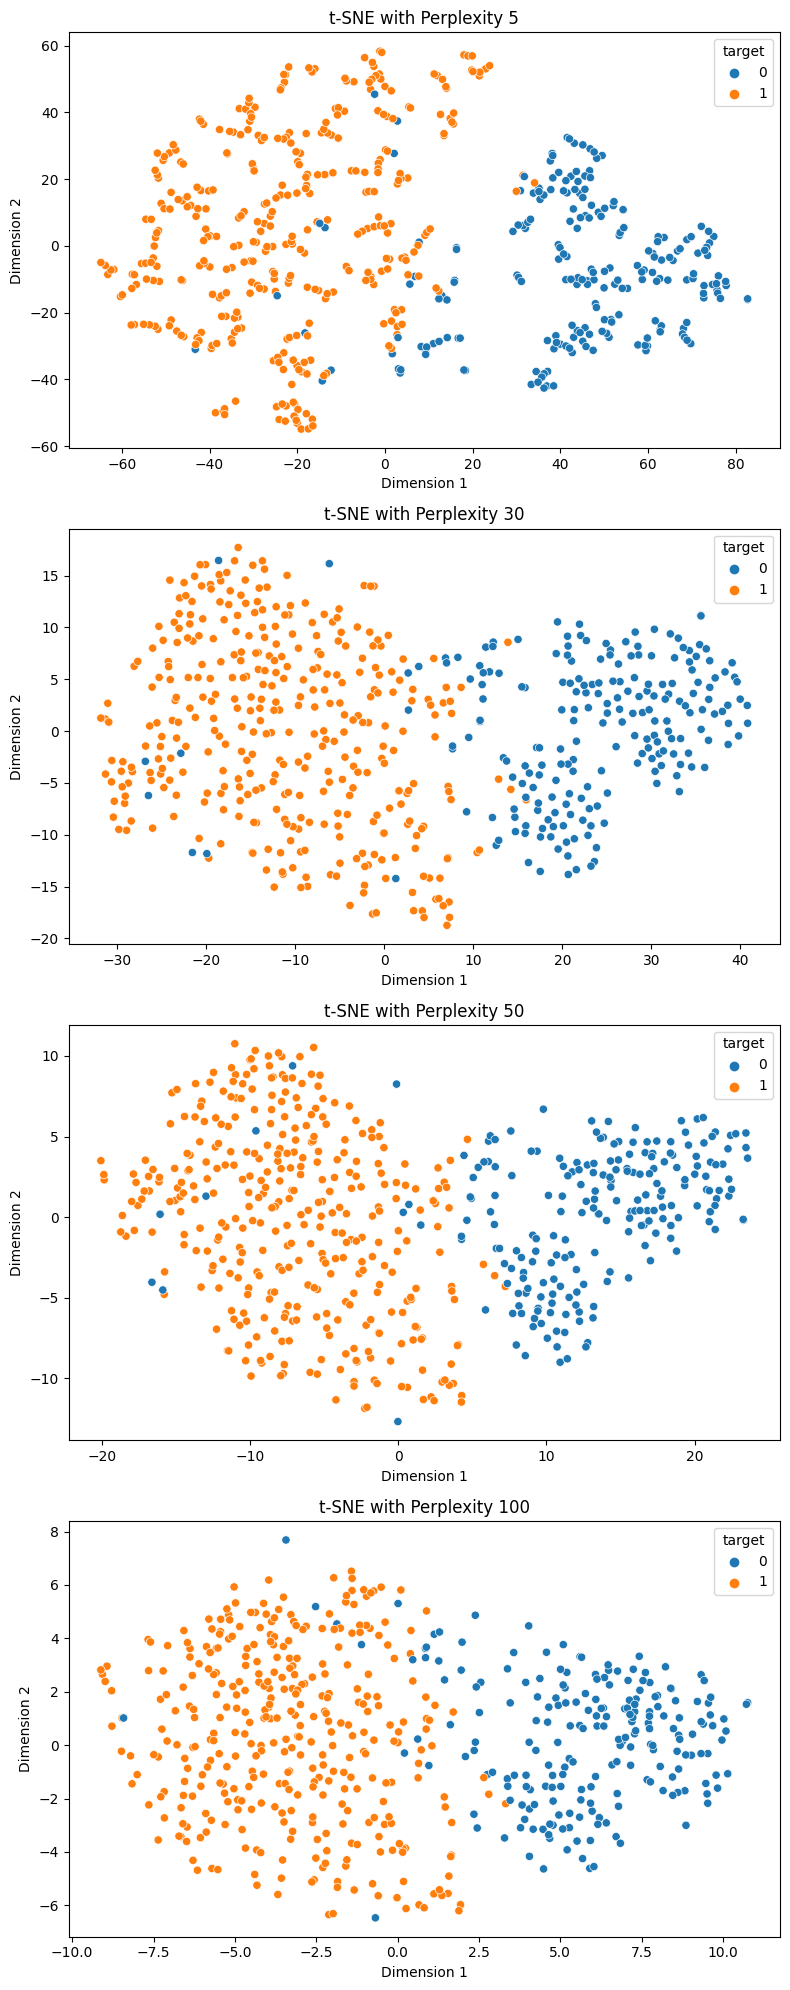

In [26]:
# t-SNE with different perplexities
perplexities = [5, 30, 50, 100]
fig, axs = plt.subplots(len(perplexities), figsize=(8, 5*len(perplexities)))

for ax, perplexity in zip(axs, perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    df_tsne = tsne.fit_transform(df_scaled)

    df_tsne = pd.DataFrame(df_tsne, columns=['Dimension 1', 'Dimension 2'])
    sns.scatterplot(data=df_tsne, x='Dimension 1', y='Dimension 2', ax=ax, hue = df_tsne_2['target'])
    ax.set_title(f't-SNE with Perplexity {perplexity}')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'UMAP with 5 Neighbors')

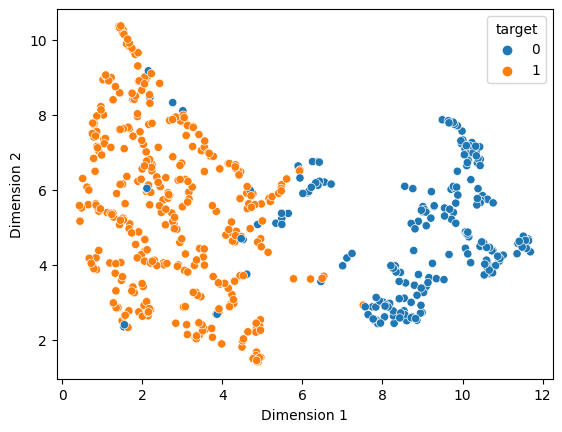

In [27]:
## --------- UMAP --------- ## 
reducer = umap.UMAP(n_neighbors=5)
df_umap_5 = reducer.fit_transform(df_scaled)

df_umap_5 = pd.DataFrame(df_umap_5, columns=['Dimension 1', 'Dimension 2'])
df_umap_5['target'] = data.target
sns.scatterplot(data=df_umap_5, x='Dimension 1', y='Dimension 2', hue = 'target' )
ax.set_title('UMAP with 5 Neighbors')

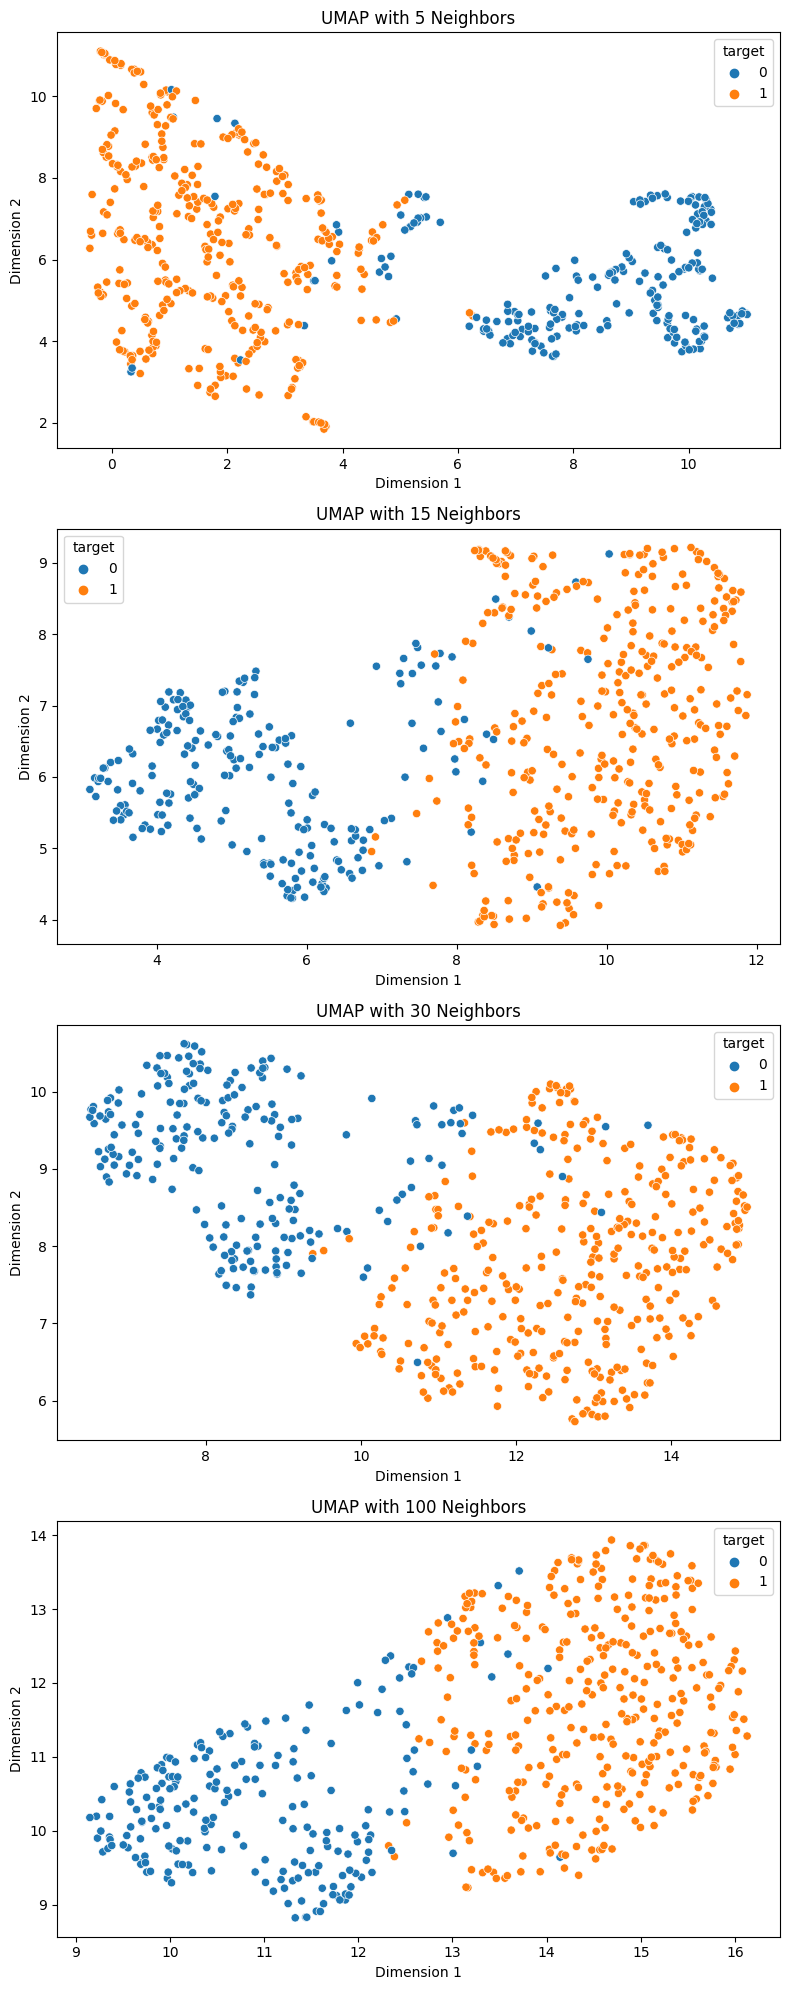

In [23]:
# UMAP with different numbers of neighbors
neighbors = [5, 15, 30, 100]
fig, axs = plt.subplots(len(neighbors), figsize=(8, 5*len(neighbors)))

for ax, n in zip(axs, neighbors):
    reducer = umap.UMAP(n_neighbors=n)
    df_umap = reducer.fit_transform(df_scaled)

    df_umap = pd.DataFrame(df_umap, columns=['Dimension 1', 'Dimension 2'])
    sns.scatterplot(data=df_umap, x='Dimension 1', y='Dimension 2', ax=ax, hue = df_umap_5['target'])
    ax.set_title(f'UMAP with {n} Neighbors')

plt.tight_layout()
plt.show()

### Your Task
Now your task is to perform a similar analysis on the iris data set. 

Task 1 : Load the iris data set.
Task 2 : Standardize the data

Task 3 : Run PCA, t-SNE and UMAP on scaled iris data.
    3.1 for t-SNE identify the best perplexity value.
    3.2 for umap identify the best neighbors value.
    3.3 plot PCA, t-SNE with best perplexity and umap with the best neighbors value


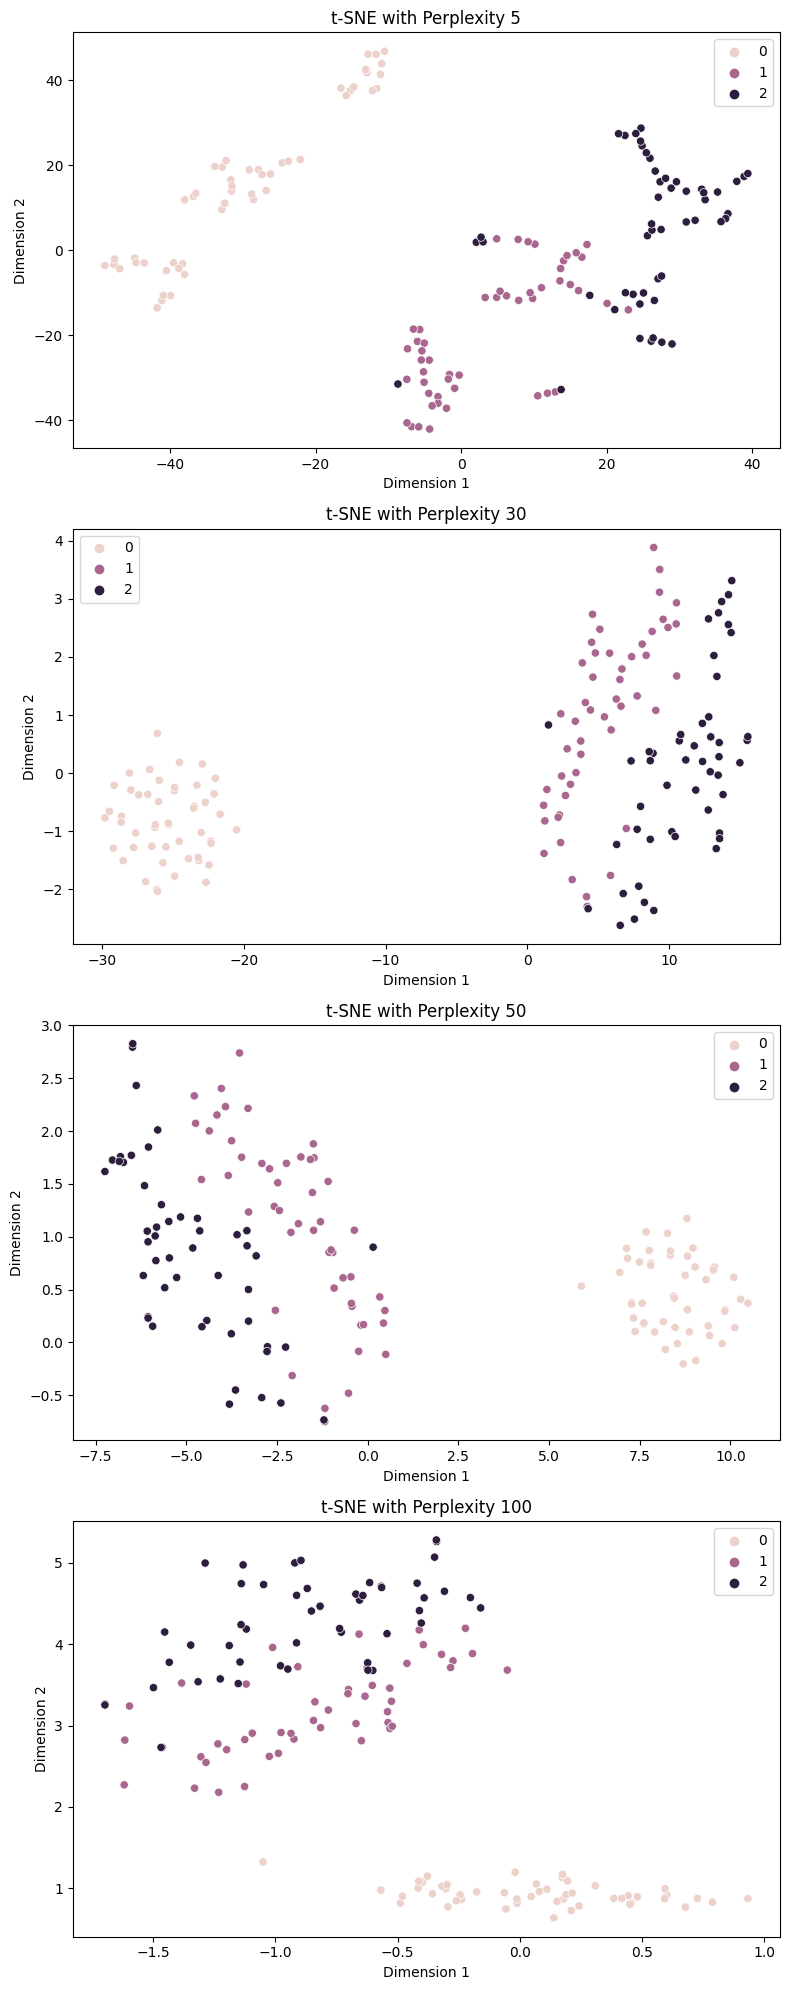

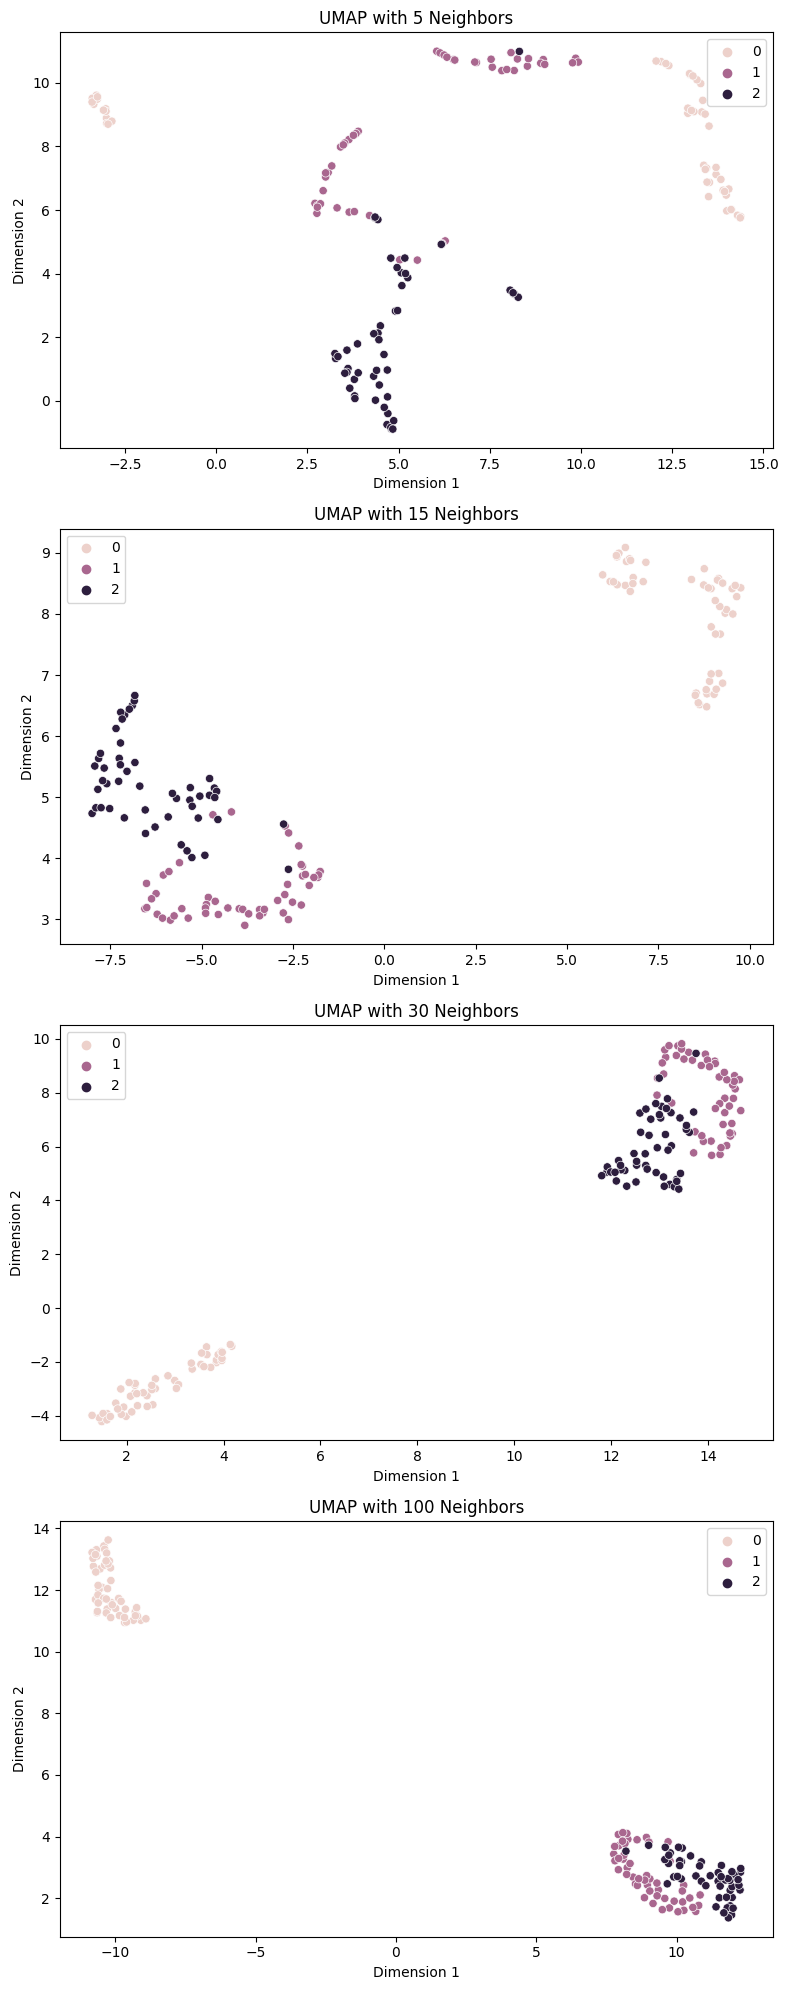

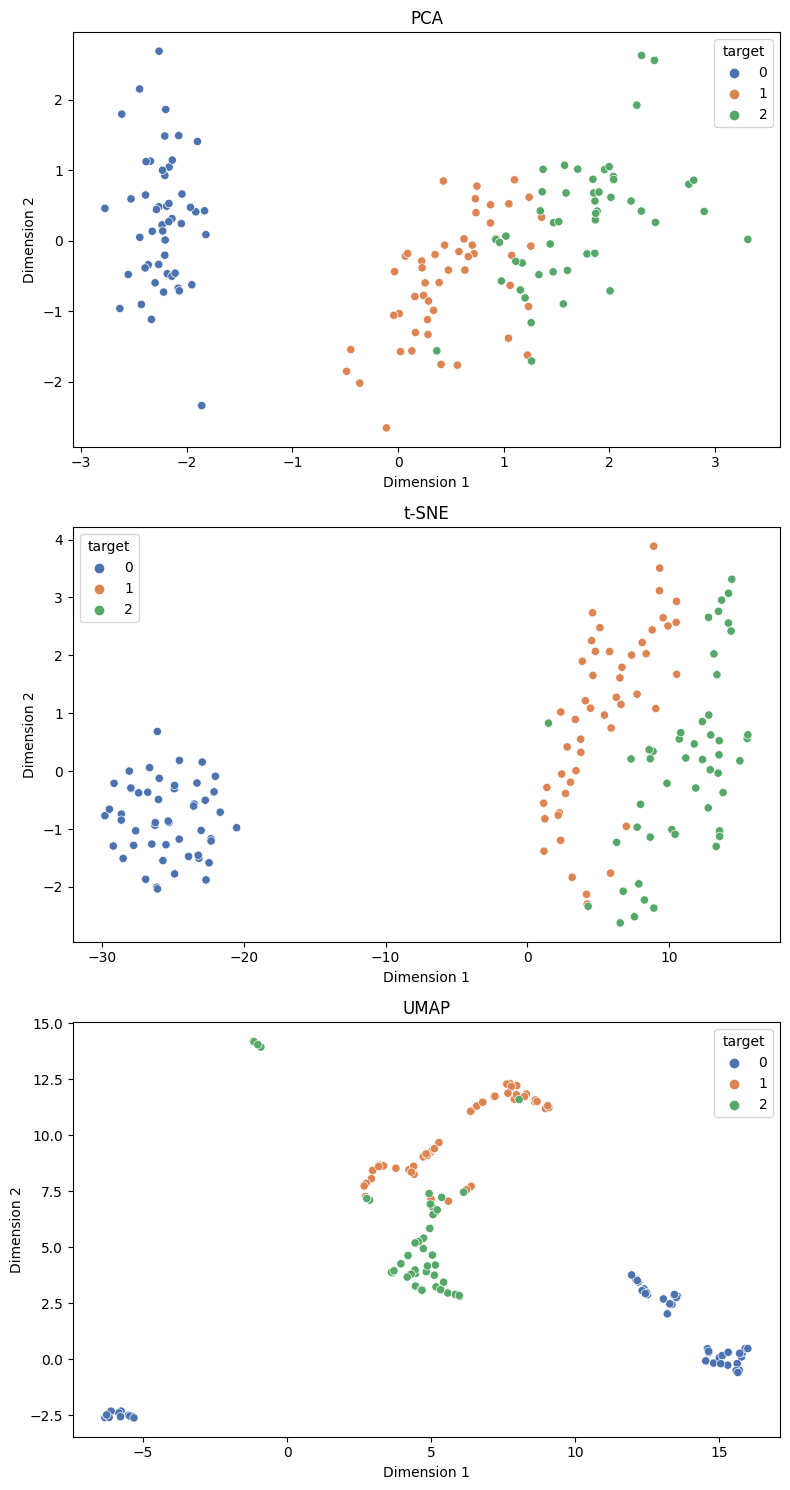

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

# Load the iris dataset
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
target = data.target

# Standardize features to have zero mean and unit variance
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

##  Run t-SNE across several perplexity values to find the best perplexity value.
perplexities = [5, 30, 50, 100]
fig, axs = plt.subplots(len(perplexities), figsize=(8, 5*len(perplexities)))

for ax, perplexity in zip(axs, perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    df_tsne = tsne.fit_transform(df_scaled)

    df_tsne = pd.DataFrame(df_tsne, columns=['Dimension 1', 'Dimension 2'])
    sns.scatterplot(data=df_tsne, x='Dimension 1', y='Dimension 2', ax=ax, hue = target)
    ax.set_title(f't-SNE with Perplexity {perplexity}')

plt.tight_layout()
plt.show()

best_perplexity = 30
tsne = TSNE(n_components=2,perplexity=best_perplexity)
df_tsne = tsne.fit_transform(df_scaled)
df_tsne = pd.DataFrame(df_tsne, columns=['Dimension 1', 'Dimension 2'])
df_tsne['target'] = target


##  Run umap across several neighbors values to find the best neighbors value.
neighbors = [5, 15, 30, 100]
fig, axs = plt.subplots(len(neighbors), figsize=(8, 5*len(neighbors)))

for ax, n in zip(axs, neighbors):
    reducer = umap.UMAP(n_neighbors=n)
    df_umap = reducer.fit_transform(df_scaled)

    df_umap = pd.DataFrame(df_umap, columns=['Dimension 1', 'Dimension 2'])
    sns.scatterplot(data=df_umap, x='Dimension 1', y='Dimension 2', ax=ax, hue = target)
    ax.set_title(f'UMAP with {n} Neighbors')

plt.tight_layout()
plt.show()

n_neighbors = 5
reducer = umap.UMAP(n_neighbors=n_neighbors)
df_umap = reducer.fit_transform(df_scaled)
df_umap = pd.DataFrame(df_umap, columns=['Dimension 1', 'Dimension 2'])
df_umap['target'] = target

## PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['Dimension 1', 'Dimension 2'])
df_pca['target'] = target


# Visualize the results
fig, axs = plt.subplots(3, figsize=(8, 15))

sns.scatterplot(data=df_pca, x='Dimension 1', y='Dimension 2', hue='target', palette='deep', ax=axs[0])
axs[0].set_title('PCA')

sns.scatterplot(data=df_tsne, x='Dimension 1', y='Dimension 2', hue='target', palette='deep', ax=axs[1])
axs[1].set_title('t-SNE')

sns.scatterplot(data=df_umap, x='Dimension 1', y='Dimension 2', hue='target', palette='deep', ax=axs[2])
axs[2].set_title('UMAP')

plt.tight_layout()
plt.show()
